In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [7]:
df= pd.read_excel("KTM New Data.xlsx")

In [8]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [9]:
df.dtypes

ID               int64
Age              int64
Gender          object
Occupation      object
Phone Type      object
Current Bike    object
Relationship    object
Response        object
dtype: object

In [10]:
df.shape

(1518, 8)

In [11]:
data_copy = df

In [12]:
data_copy.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [13]:
df.dtypes

ID               int64
Age              int64
Gender          object
Occupation      object
Phone Type      object
Current Bike    object
Relationship    object
Response        object
dtype: object

In [14]:
data_copy= data_copy.drop("ID",axis=1)

In [15]:
data_copy.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [11]:
data_copy = data_copy.drop(0,axis=0)

In [12]:
data_copy.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
1,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,29,Male,Student,Average,180 to 220,Complicated,Purchased
5,54,Female,Self Employed,Low End,No Bike,Committed,Not purchased


In [16]:
# dropping ID column from data frame
df = df.drop("ID",axis= 1)

In [17]:
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,29,Male,Student,Average,180 to 220,Complicated,Purchased


# Exploratory Data Analysis (EDA)


In [15]:
# performing descriptive stats
df.describe()

,Age
count,1518.000000
mean,32.731225
std,13.258555
min,18.000000
25%,22.000000
50%,28.000000
75%,44.000000
max,60.000000


In [16]:
df.skew()

Age    0.578196
dtype: float64

In [17]:
df.kurt()

Age   -1.062996
dtype: float64

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

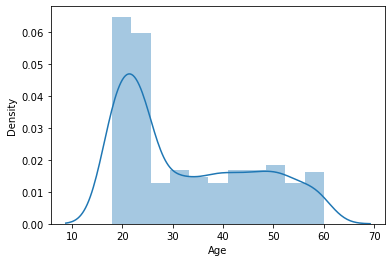

In [18]:
# visulaziation on age using seaborn
sns.distplot(df["Age"])

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

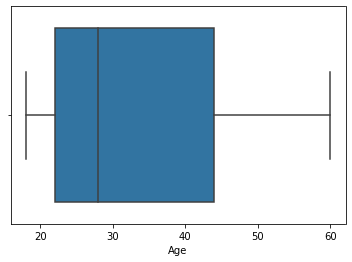

In [19]:
# boxplot for outlier identification
sns.boxplot(df['Age'])

In [20]:
# checking for missing value in data
df.isnull().sum()

Age             0
Gender          0
Occupation      0
Phone Type      0
Current Bike    0
Relationship    0
Response        0
dtype: int64

In [21]:
# replacement for age column
# df['Age']= df['Age'].isnull().replace(df['Age'].mean())

In [22]:
# outlier treatment 

In [23]:
# visualization on categorical data
# visualization on gender
G= df['Gender'].value_counts()

In [24]:
G

Female    816
Male      702
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender split of customers')

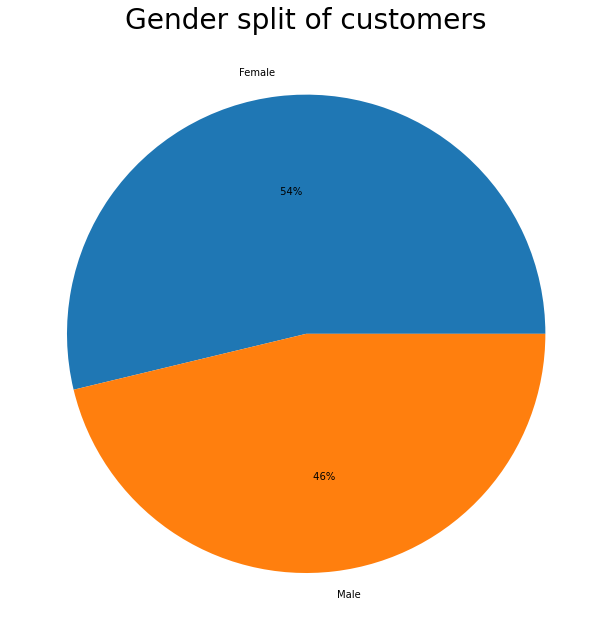

In [25]:
gen= [816,702]
gen_labels= ['Female','Male']
plt.figure(figsize= (12,11)) # figure is a function which is used to adjust the size of the graph
plt.pie(gen,labels= gen_labels,autopct= '%3.0f%%')
kwargs= {'fontsize': 28,'color' : 'black'}
plt.title("Gender split of customers",**kwargs)

In [26]:
# visualization on occupation
O= df['Occupation'].value_counts()

In [27]:
O

Student          686
Self Employed    295
Unemployed       274
Professional     263
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'occupation split of customers')

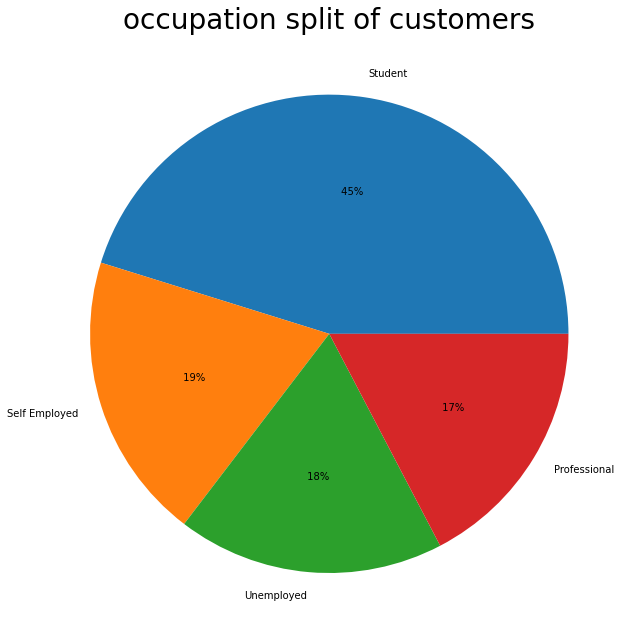

In [28]:
occ = [686,295,274,263]
occ_labels= ['Student','Self Employed','Unemployed','Professional']
plt.figure(figsize= (12,11)) # figure is a function which is used to adjust the size of the graph
plt.pie(occ,labels= occ_labels,autopct= '%3.0f%%')
kwargs= {'fontsize': 28,'color' : 'black'}
plt.title("occupation split of customers",**kwargs)

In [29]:
# visualization on phonetype
P= df['Phone Type'].value_counts()

In [30]:
P

High End    836
Low End     343
Average     339
Name: Phone Type, dtype: int64

Text(0.5, 1.0, 'Phonetype split of customers')

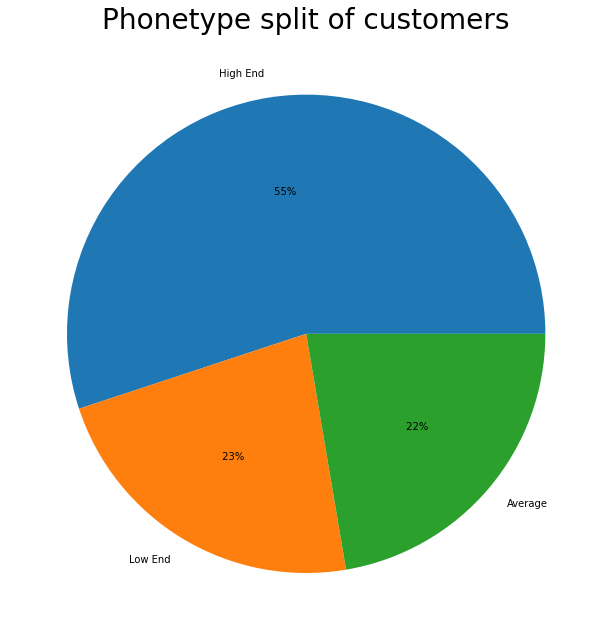

In [31]:
phtype= [836,343,339]
phtype_labels= ['High End','Low End','Average']
plt.figure(figsize= (12,11)) # figure is a function which is used to adjust the size of the graph
plt.pie(phtype,labels= phtype_labels,autopct= '%3.0f%%')
kwargs= {'fontsize': 28,'color' : 'black'}
plt.title("Phonetype split of customers",**kwargs)

In [32]:
# visualization on current bike
C= df['Current Bike'].value_counts()

In [33]:
C

180 to 220       420
125 to 180       333
Below 125        300
No Bike          254
220 and Above    211
Name: Current Bike, dtype: int64

Text(0.5, 1.0, 'Current Bike split of customers')

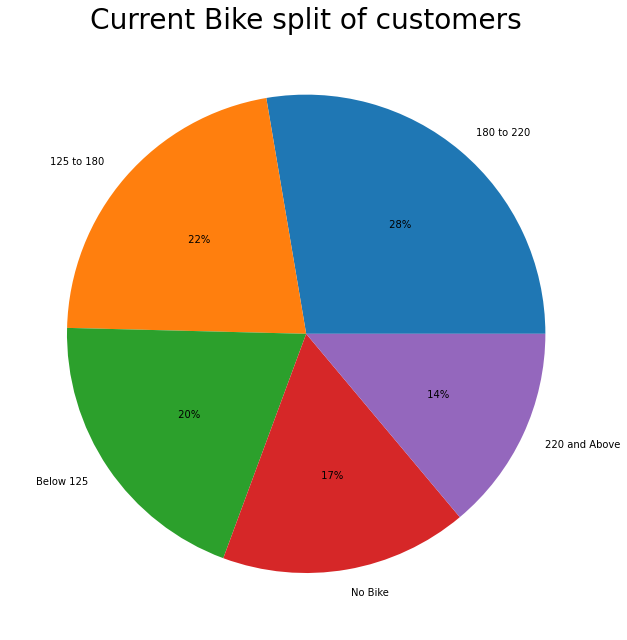

In [34]:
currbike = [420,333,300,254,211]
currbike_labels= ['180 to 220 ','125 to 180 ','Below 125','No Bike','220 and Above']
plt.figure(figsize= (12,11)) # figure is a function which is used to adjust the size of the graph
plt.pie(currbike,labels= currbike_labels,autopct= '%3.0f%%')
kwargs= {'fontsize': 28,'color' : 'black'}
plt.title("Current Bike split of customers",**kwargs)

In [35]:
# visualization on relationship
R = df['Relationship'].value_counts()

In [36]:
R

Single         490
Complicated    384
Committed      331
Married        313
Name: Relationship, dtype: int64

Text(0.5, 1.0, 'Relationship split of customers')

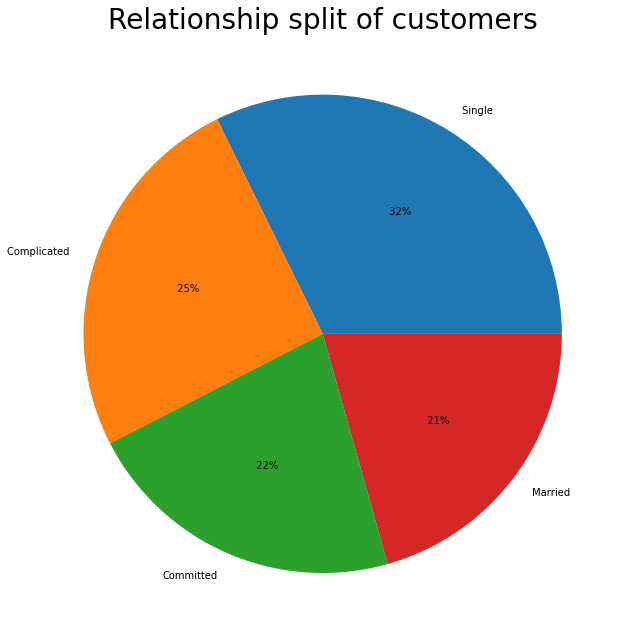

In [37]:
relation = [490,384,331,313]
relation_labels= ['Single ','Complicated ','Committed','Married']
plt.figure(figsize= (12,11)) # figure is a function which is used to adjust the size of the graph
plt.pie(relation,labels= relation_labels,autopct= '%3.0f%%')
kwargs= {'fontsize': 28,'color' : 'black'}
plt.title("Relationship split of customers",**kwargs)

In [38]:
# visualization on response
Re = df['Response'].value_counts()

In [39]:
Re

Purchased        872
Not purchased    646
Name: Response, dtype: int64

Text(0.5, 1.0, 'Response split of customers')

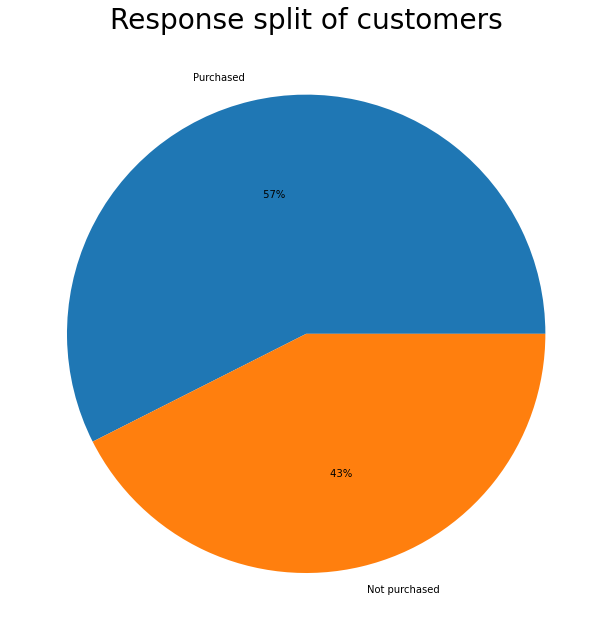

In [40]:
response = [872,646]
response_labels= ['Purchased','Not purchased']
plt.figure(figsize= (12,11)) # figure is a function which is used to adjust the size of the graph
plt.pie(response,labels= response_labels,autopct= '%3.0f%%')
kwargs= {'fontsize': 28,'color' : 'black'}
plt.title("Response split of customers",**kwargs)

In [41]:
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [42]:
# performing label Encoding for the data

In [18]:
le= LabelEncoder()

In [19]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Phone Type'] = le.fit_transform(df['Phone Type'])
df['Current Bike'] = le.fit_transform(df['Current Bike'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Response'] = le.fit_transform(df['Response'])

df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,1,0,0,1,1,0
1,27,0,1,2,4,3,1
2,39,0,3,0,1,2,0
3,20,0,3,1,4,2,0
4,29,1,2,0,1,1,1


In [20]:
# model building using logistic regression

In [21]:
# separating x & y
x= df.iloc[:,0:6]
# x= df.iloc[:,:-1] will exclude the last respose column 
x.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship
0,53,1,0,0,1,1
1,27,0,1,2,4,3
2,39,0,3,0,1,2
3,20,0,3,1,4,2
4,29,1,2,0,1,1


In [22]:
y= df.loc[:,'Response']

In [23]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1513    1
1514    1
1515    1
1516    1
1517    1
Name: Response, Length: 1518, dtype: int32

In [24]:
# storing logistic regression in a small variable and  building model
lr= LogisticRegression()


In [25]:
lr.fit(x,y)

LogisticRegression()

In [26]:
new_y= lr.predict(x)

In [27]:
# model evaluation

In [28]:
accuracy_score(y,new_y)

0.7628458498023716

In [29]:
confusion_matrix(y,new_y)

array([[432, 214],
       [146, 726]], dtype=int64)

In [30]:
print(classification_report(y,new_y))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       646
           1       0.77      0.83      0.80       872

    accuracy                           0.76      1518
   macro avg       0.76      0.75      0.75      1518
weighted avg       0.76      0.76      0.76      1518



In [31]:
# Splitting the data into train and test

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.3)

In [32]:
print('the size of the entire data before splitting :', x.shape)
print('the size of the train data after splitting :', x_train.shape)
print('the size of the test data after splitting :', x_test.shape)

the size of the entire data before splitting : (1518, 6)
the size of the train data after splitting : (1062, 6)
the size of the test data after splitting : (456, 6)


In [33]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)


0.7324561403508771

In [34]:
# Building the model with Decision Tree algorithm
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
accuracy_score(y_test,dt_pred)

0.743421052631579

# Random forest implementation

In [60]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
# finding best estimator for Random forest
params= {'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]}
tuned_rf= RandomForestClassifier()
hypertuned_rf= GridSearchCV(estimator= tuned_rf,param_grid= params)

In [62]:
hypertuned_rf.fit(x,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]})

In [63]:
hypertuned_rf.best_score_

0.7366792600312664

In [64]:
hypertuned_rf.best_params_

{'n_estimators': 10}

In [65]:
rf= RandomForestClassifier(n_estimators=90)

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=90)

In [67]:
rf_pred=rf.predict(x_test)

In [68]:
accuracy_score(y_test,rf_pred)

0.7280701754385965

# implementing Ada Boost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
params= {'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]}
tuned_ada = AdaBoostClassifier()
hypertuned_ada = GridSearchCV(estimator= tuned_ada,param_grid= params)

In [71]:
hypertuned_ada.fit(x,y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]})

In [72]:
hypertuned_ada.best_estimator_

AdaBoostClassifier(n_estimators=70)

In [73]:
hypertuned_ada.best_score_

0.7577405766892479

In [74]:
ada= AdaBoostClassifier(n_estimators=70)

In [75]:
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=70)

In [76]:
ada_pred= ada.predict(x_test)

In [77]:
accuracy_score(ada_pred,y_test)

0.7719298245614035

# GBoost Model

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [79]:
params= {'learning_rate':[0.9,0.7,0.5,0.6,0.4,0.3,0.2,0.1,1],
         'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
        'max_leaf_nodes':[8,12,14,16,18,20,22,24,26,28,30,32]}

In [80]:
tuned_gb= GradientBoostingClassifier()
hypertuned_gb= RandomizedSearchCV(estimator= tuned_gb,param_distributions=params)

In [81]:
hypertuned_gb.fit(x,y)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.9, 0.7, 0.5, 0.6,
                                                          0.4, 0.3, 0.2, 0.1,
                                                          1],
                                        'max_leaf_nodes': [8, 12, 14, 16, 18,
                                                           20, 22, 24, 26, 28,
                                                           30, 32],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]})

In [82]:
hypertuned_gb.best_score_

0.7425807712350183

In [83]:
hypertuned_gb.best_params_

{'n_estimators': 150, 'max_leaf_nodes': 26, 'learning_rate': 0.6}

In [84]:
gb= GradientBoostingClassifier(n_estimators= 30, max_leaf_nodes=  22, learning_rate= 1)

In [85]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_leaf_nodes=22, n_estimators=30)

In [86]:
gb_pred= gb.predict(x_test)

In [87]:
accuracy_score(y_test,gb_pred)

0.743421052631579

# XGboost implementation

In [88]:
from xgboost import XGBClassifier

In [107]:
xgb= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=90, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=130, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=3, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [96]:
#n_estimators : int
    #reg_lambda : float (xgb's lambda)
                      #  learning_rate
                       # gamma 

In [100]:
params= {'n_estimators' : [50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250],
        'learning_rate' : [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
        'gamma' : [10,20,30,40,50,60,70,80,90,100],
        'reg_lambda' : [1,2,3,4,5,6,7,8,9,10]}

In [101]:
tuned_xgboost= RandomizedSearchCV(estimator= xgb, param_distributions= params)

In [102]:
tuned_xgboost.fit(x,y)

[19:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           use_label_enco

In [103]:
tuned_xgboost.best_score_

0.7656917665450755

In [104]:
tuned_xgboost.best_params_

{'reg_lambda': 3, 'n_estimators': 130, 'learning_rate': 0.9, 'gamma': 90}

In [105]:
tuned_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=90, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=3, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [108]:
xgb.fit(x_train,y_train)

[19:55:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=90, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=3, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [109]:
xgb_pred= xgb.predict(x_test)

In [110]:
accuracy_score(y_test,xgb_pred)

0.7807017543859649

# Implementation of Naive Bayes using Gaussian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb= GaussianNB()

In [37]:
nb.fit(x_train,y_train)

GaussianNB()

In [38]:
nb_pred= nb.predict(x_test)

In [39]:
accuracy_score(nb_pred,y_test)

0.7456140350877193